In [21]:
# Import dati dalla prof
from scipy.io import loadmat
import numpy as np
import scipy.linalg as spl
import RisolviSis as RS
import matplotlib.pyplot as plt
dati = loadmat('testE.mat')
A=dati["A"] 
b=dati["b"]


In [22]:
def creaPoisson(n):
    #costruire una matrice di Poisson
    d=np.ones((n))*4
    e=-np.ones((n-1,))
    f=-np.ones((n-3,))
    A=np.diag(d)+np.diag(e,-1)+np.diag(e,1)+np.diag(f,-3)+np.diag(f,3)
    return A

# Jacobi

In [23]:
def jacobi(A, b, x0, toll, itmax):
    # La dichiaro per buona norma anche se Python ha scope di lettura che va anche al di fuori
    # dell'ambito della funzione
    n = A.shape[0]
    # Estraggo la diagonale dalla matrice A
    d = np.diag(A)
    # Costruisco la matrice diagonale
    D = np.diag(d)
    # Creo la matrice triangola inferiore da A, -1 perchè escludo la diagonale
    E = np.tril(A, - 1)
    # Estraggo dalla matrice A la sua matrice triangolare superiore, con diagonale nulla
    F = np.triu(A, 1)

    # M = D, Si costruisce la matrice M
    N = - (E + F)

    # Cercando il raggio spettrale, devo vede che questo sia minore di 1 affinché ci sia una veloce
    # convergenza del metodo iterativo. Inversa di una matrice diagonale è una matrice diagonale con
    # elementi inversi
    invM = np.diag(1/d)
    T = np.dot(invM, N)

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    autT = np.linalg.eigvals(T)
    rho = np.max(np.abs(autT))
    print("Raggio spettrale:    ", rho)
    if (rho > 1):
        print("Raggio spettrale maggiore di 1, nessuna soluzione")

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni. Tengo traccia del vettore
    # degli errori per poi fare un grafico rappresentativo
    it = 0
    err_vet = []
    err = 1000

    # Imposto le condizioni di convergenza ad itmax iterate e alla quantità di errore maggiore
    # rispetto ad una determinata tolleranza. Moltiplicare per una matrice diagonale significa
    # dividere una matrice per la diagonale stessa
    while it <= itmax and err >= toll:
        x = (b + np.dot(N, x0)) / d.reshape(n, 1)
        # Se c'è convergenza le soluzioni non cambiano più
        err = np.linalg.norm(x - x0) / np.linalg.norm(x)
        err_vet.append(err)
        # Al passo successivo, x0 sarà la x del passo precedente
        x0 = x.copy()
        it += 1

    return x, it, err_vet


Raggio spettrale:     0.9997193113493907
Soluzione:    [[8.99279621e-01]
 [8.03220479e-01]
 [7.14349387e-01]
 [6.29432376e-01]
 [5.53322600e-01]
 [4.80462632e-01]
 [4.17309198e-01]
 [3.56738665e-01]
 [3.06035512e-01]
 [2.57314444e-01]
 [2.17970305e-01]
 [1.80092847e-01]
 [1.50611692e-01]
 [1.22175870e-01]
 [1.00860069e-01]
 [8.02611226e-02]
 [6.53994858e-02]
 [5.10103859e-02]
 [4.10246060e-02]
 [3.13379437e-02]
 [2.48753514e-02]
 [1.85943965e-02]
 [1.45680764e-02]
 [1.06474492e-02]
 [8.23390178e-03]
 [5.87921576e-03]
 [4.48793308e-03]
 [3.12797959e-03]
 [2.35717274e-03]
 [1.60227636e-03]
 [1.19207780e-03]
 [7.89573413e-04]
 [5.80019956e-04]
 [3.74000796e-04]
 [2.71302188e-04]
 [1.70140693e-04]
 [1.21890325e-04]
 [7.42701895e-05]
 [5.25542973e-05]
 [3.10806006e-05]
 [2.17256616e-05]
 [1.24574608e-05]
 [8.60385108e-06]
 [4.77985502e-06]
 [3.26476963e-06]
 [1.76277765e-06]
 [1.19974433e-06]
 [6.54347831e-07]
 [4.72766344e-07]
 [3.38570974e-07]
 [3.38570974e-07]
 [4.72766343e-07]
 [6.54347

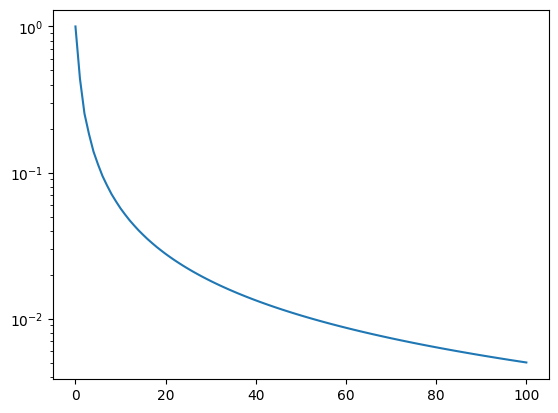

In [24]:
# Creo il vettore colonna. Il vettore in questione, senza reshape è un array 1D che non è adatto
# alle operazioni con vettori colonna
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
# Posso scegliere un qualunque vettore iniziale
x0 = np.zeros((n, 1))
itmax = 100
toll = 1e-8
xJ, itJ, err_vetJ = jacobi(A, b, x0, toll, itmax)

print("Soluzione:   ", xJ)
print("Iterazioni:  ", itJ)

plt.semilogy(np.arange(itJ), err_vetJ)
plt.show()


# Gauss-Siedel

In [25]:
def gauss_seidel(A, b, x0, toll, itmax):
    # La dichiaro per buona norma anche se Python ha scope di lettura che va anche al di fuori
    # dell'ambito della funzione
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, - 1)
    F = np.triu(A, 1)

    # Devo introdurre un parametro omega che riduca il più possibile il raggio spettrale
    M = D + E
    N = -F
    invM = np.linalg.inv(M)
    T = np.dot(invM, N)

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    autT = np.linalg.eigvals(T)
    rho = np.max(np.abs(autT))
    print("Raggio spettrale:    ", rho)
    if (rho > 1):
        print("Raggio spettrale maggiore di 1, nessuna soluzione")

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni. Tengo traccia del vettore
    # degli errori per poi fare un grafico rappresentativo
    it = 0
    err_vet = []
    err = 1000

    # Imposto le condizioni di convergenza ad itmax iterate e alla quantità di errore maggiore
    # rispetto ad una determinata tolleranza. Moltiplicare per una matrice diagonale significa
    # dividere una matrice per la diagonale stessa
    while it <= itmax and err >= toll:
        temp = b - np.dot(F, x0)
        x, flag = RS.Lsolve(M, temp)
        err = np.linalg.norm(x - x0) / np.linalg.norm(x)
        err_vet.append(err)
        x0 = x.copy()
        it += 1

    return x, it, err_vet


Raggio spettrale:     0.19431515030791588
Soluzione GS:     [[1.]
 [1.]
 [1.]]
Iterazioni GS:    13


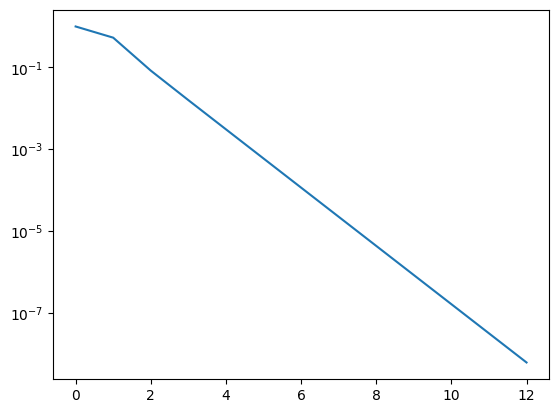

In [26]:
A = np.array([[4, 1, 3], [3, 4, 1], [1, 1, 17]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
# Posso scegliere un qualunque vettore iniziale
x0 = np.zeros((n, 1))
itmax = 100
toll = 1e-8
xG, itG, err_vetG = gauss_seidel(A, b, x0, toll, itmax)

print("Soluzione GS:    ", xG)
print("Iterazioni GS:   ", itG)

plt.semilogy(np.arange(itG), err_vetG)
plt.show()


# Gauss-Siedel SOR

In [27]:
def gauss_seidel_sor(A, b, x0, omega, toll, itmax):
    # La dichiaro per buona norma anche se Python ha scope di lettura che va anche al di fuori
    # dell'ambito della funzione
    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    Dinv = np.diag(1/d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)

    # Devo introdurre un parametro omega che riduca il più possibile il raggio spettrale
    Momega = D+omega*E
    Nomega = (1-omega)*D-omega*F
    T = np.dot(np.linalg.inv(Momega), Nomega)

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni. Tengo traccia del vettore
    # degli errori per poi fare un grafico rappresentativo
    M = D+E
    N = -F
    it = 0
    xold = x0.copy()
    xnew = x0.copy()
    er_vet = []

    # Imposto le condizioni di convergenza ad itmax iterate e alla quantità di errore maggiore
    # rispetto ad una determinata tolleranza. Moltiplicare per una matrice diagonale significa
    # dividere una matrice per la diagonale stessa
    while it <= itmax and errore >= toll:
        temp = b-np.dot(F, xold)
        xtilde, flag = RS.Lsolve(M, temp)
        xnew = (1-omega)*xold+omega*xtilde
        errore = np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold = xnew.copy()
        it = it+1
    return xnew, it, er_vet


raggio spettrale Gauss-Seidel SOR  0.46537983832374846
Soluzione GSS:     [[1.]
 [1.]
 [1.]]
Iterazioni GSS:    24


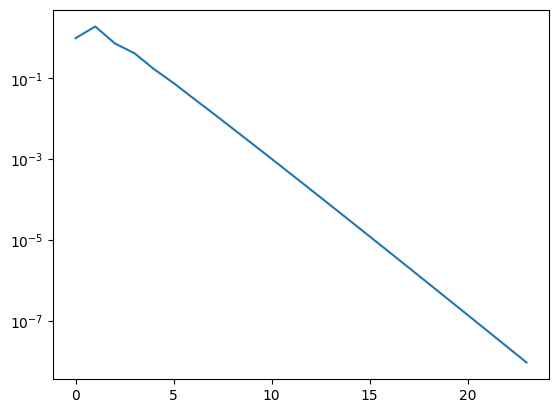

In [28]:
A = np.array([[4, 1, 3], [3, 4, 1], [1, 1, 17]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
# Posso scegliere un qualunque vettore iniziale
x0 = np.zeros((n, 1))
# omega deve avere un valore tra 0 e 2
omega = 1.4
itmax = 100
toll = 1e-8
xG, itG, err_vetG = gauss_seidel_sor(A, b, x0, omega, toll, itmax)

print("Soluzione GSS:    ", xG)
print("Iterazioni GSS:   ", itG)

plt.semilogy(np.arange(itG), err_vetG)
plt.show()


# Gradiente

In [29]:
def steepestdescent(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
   # inizializzare le variabili necessarie
    x = x0
    r = A.dot(x)-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore>= tol and it< itmax:
        it=it+1
        Ap=A.dot(p)
        rTr=np.dot(r.T, r)
        alpha = rTr / np.dot(p.T, Ap)
                
        x = x + alpha*p
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r 
        
    
    return x,vet_r,vec_sol,it


# Gradiente Coniugato

In [30]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    r = A.dot(x)-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per trovare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A.dot(p)
        rtr=np.dot(r.T, r)
        alpha = rtr / np.dot(p.T, Ap)
        x = x + alpha *p
        vec_sol.append(x)
        r=r+alpha*Ap
        gamma=np.dot(r.T,r)/rtr
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r+gamma*p
   
    
    return x,vet_r,vec_sol,it

Condizionameto di A 81429.27286835498
Iterazioni Gradiente  10000
Iterazioni Gradiente Coniugato  241
81429.27286835498


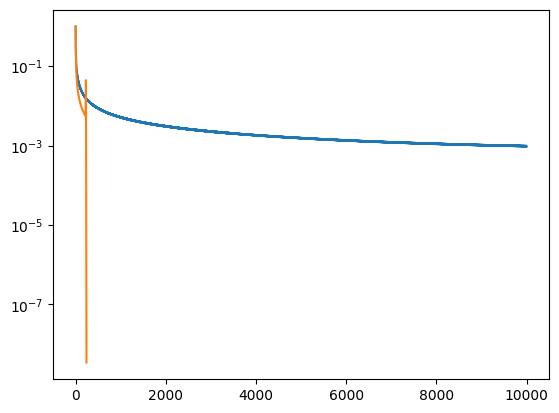

In [31]:
n=1000
A=creaPoisson(n)
print("Condizionameto di A", np.linalg.cond(A))
b=np.sum(A,axis=1).reshape(n,1)
toll=1e-8
it_max=10000
n=A.shape[0]
x0=np.zeros_like(b)

x_gr,vet_r_gr,vec_sol_gr,itG=steepestdescent(A,b,x0,it_max,toll)
print("Iterazioni Gradiente ",itG)
x_cg,vet_r_cg,vec_sol_cg,itCG=conjugate_gradient(A,b,x0,it_max,toll)
print("Iterazioni Gradiente Coniugato ",itCG)
plt.semilogy(np.arange(itG+1),vet_r_gr,np.arange(itCG+1),vet_r_cg)
print(np.linalg.cond(A))